## Import all the libaries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# np.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.0f}'.format)

## All functions are used in this package

In [34]:
scaler = StandardScaler()

def to_df(data_list):
    X_df = [i[:-1] for i in data_list]
    y_df = [i[-1] for i in data_list]
    transposed_lists = [list(x) for x in zip(*X_df)]

    df_list = pd.DataFrame({f'Column{i+1}': lst for i, lst in enumerate(transposed_lists)})
    df_list['Target'] = y_df
    return df_list

def transform_to_multivariate(data, T):
    M = []
    for i in range(len(data) - T):
        row = data[i:i + T + 1]
        M.append(row)
    return np.array(M)

def calculate_similarity(value_lst_after, value_lst_before):
        T = len(value_lst_after)  # Number of missing values
        similarity_sum = 0

        for i in range(T):
            yi = value_lst_after[i]
            xi = value_lst_before[i]
            similarity_sum += 1 / (1 + abs(yi - xi) / (max(value_lst_before) - min(value_lst_before)))

        similarity = similarity_sum / T
        return similarity

def calculate_metrics_for_ML(value_lst_after):
    
    df_before_missing = pd.read_csv('temp_PhuLieu.csv')
    value_lst_missing = df_before_missing['Temp'].values.tolist()[nan_index:nan_index+size_of_gap]

    
    def calculate_MAE(value_lst_missing, value_lst_after):
        return mean_absolute_error(value_lst_missing, value_lst_after)

    def calculate_RMSE(value_lst_missing, value_lst_after):
        return np.sqrt(mean_squared_error(value_lst_missing, value_lst_after))

    def calculate_FB(value_lst_missing, value_lst_after):
        return 2 * abs((np.mean(value_lst_after) - np.mean(value_lst_missing)) / (np.mean(value_lst_after) + np.mean(value_lst_missing)))

    def calculate_fsd(value_lst_missing, value_lst_after):
        std_dev_Y = np.std(value_lst_after)
        std_dev_X = np.std(value_lst_missing)

        if std_dev_X == 0:
            return None
        
        fsd = 2 * abs((std_dev_Y - std_dev_X) / (std_dev_X + std_dev_Y))
        
        return fsd

    similarity_score = calculate_similarity(value_lst_after, value_lst_missing)
    MAE_score = calculate_MAE(value_lst_missing, value_lst_after)
    RMSE_score = calculate_RMSE(value_lst_missing, value_lst_after)
    FB_score = calculate_FB(value_lst_missing, value_lst_after)
    FSD_score = calculate_fsd(value_lst_missing, value_lst_after)

    print('\nOri_data:', value_lst_missing)
    print('\nvalue_data:', value_lst_after)
    print('\nSimilarity_score:', similarity_score)
    print('\nMean Absolute Error (MAE):', MAE_score)
    print('\nRoot Mean Squared Error (RMSE):', RMSE_score)
    print('\nFractional Bias Score:', FB_score)
    print('\nFraction of Standard Deviation Score:', FSD_score)
    
def calculate_metrics_for_ARIMA(value_lst_after):
    
    df_before_missing = pd.read_csv('temp_PhuLieu.csv')
    value_lst_missing = df_before_missing['Temp'].values.tolist()[nan_index:nan_index+size_of_gap]

    
    def calculate_MAE(value_lst_missing, value_lst_after):
        return mean_absolute_error(value_lst_missing, value_lst_after)

    def calculate_RMSE(value_lst_missing, value_lst_after):
        return np.sqrt(mean_squared_error(value_lst_missing, value_lst_after))

    def calculate_FB(value_lst_missing, value_lst_after):
        return 2 * abs((np.mean(value_lst_after) - np.mean(value_lst_missing)) / (np.mean(value_lst_after) + np.mean(value_lst_missing)))

    def calculate_fsd(value_lst_missing, value_lst_after):
        std_dev_Y = np.std(value_lst_after)
        std_dev_X = np.std(value_lst_missing)

        if std_dev_X == 0:
            return None
        
        fsd = 2 * abs((std_dev_Y - std_dev_X) / (std_dev_X + std_dev_Y))
        
        return fsd

    similarity_score = calculate_similarity(value_lst_after, value_lst_missing)
    MAE_score = calculate_MAE(value_lst_missing, value_lst_after)
    RMSE_score = calculate_RMSE(value_lst_missing, value_lst_after)
    FB_score = calculate_FB(value_lst_missing, value_lst_after)
    FSD_score = calculate_fsd(value_lst_missing, value_lst_after)

    print('\nOri_data:', value_lst_missing)
    print('\nvalue_data:', value_lst_after)
    print('\nSimilarity_score:', similarity_score)
    print('\nMean Absolute Error (MAE):', MAE_score)
    print('\nRoot Mean Squared Error (RMSE):', RMSE_score)
    print('\nFractional Bias Score:', FB_score)
    print('\nFraction of Standard Deviation Score:', FSD_score)
     
def calculate_metrics_for_ARIMA_ML(value_lst_after):
    
    df_before_missing = pd.read_csv('temp_PhuLieu.csv')
    value_lst_missing = df_before_missing['Temp'].values.tolist()[nan_index:nan_index+size_of_gap]

    
    def calculate_MAE(value_lst_missing, value_lst_after):
        return mean_absolute_error(value_lst_missing, value_lst_after)

    def calculate_RMSE(value_lst_missing, value_lst_after):
        return np.sqrt(mean_squared_error(value_lst_missing, value_lst_after))

    def calculate_FB(value_lst_missing, value_lst_after):
        return 2 * abs((np.mean(value_lst_after) - np.mean(value_lst_missing)) / (np.mean(value_lst_after) + np.mean(value_lst_missing)))

    def calculate_fsd(value_lst_missing, value_lst_after):
        std_dev_Y = np.std(value_lst_after)
        std_dev_X = np.std(value_lst_missing)

        if std_dev_X == 0:
            return None
        
        fsd = 2 * abs((std_dev_Y - std_dev_X) / (std_dev_X + std_dev_Y))
        
        return fsd

    similarity_score = calculate_similarity(value_lst_after, value_lst_missing)
    MAE_score = calculate_MAE(value_lst_missing, value_lst_after)
    RMSE_score = calculate_RMSE(value_lst_missing, value_lst_after)
    FB_score = calculate_FB(value_lst_missing, value_lst_after)
    FSD_score = calculate_fsd(value_lst_missing, value_lst_after)

    print('\nOri_data:', value_lst_missing)
    print('\nvalue_data:', value_lst_after)
    print('\nSimilarity_score:', similarity_score)
    print('\nMean Absolute Error (MAE):', MAE_score)
    print('\nRoot Mean Squared Error (RMSE):', RMSE_score)
    print('\nFractional Bias Score:', FB_score)
    print('\nFraction of Standard Deviation Score:', FSD_score)
    
def create_continuous_missing_values(dataframe, column_name, num_missing_values):
    modified_df = dataframe.copy()

    random_index = random.randint(0, len(dataframe) - num_missing_values - 1)

    modified_df.loc[random_index:random_index + num_missing_values - 1, column_name] = np.nan

    return modified_df  

### Read data files and make random missing values

In [35]:
df = pd.read_csv('temperature_data.csv')

df = create_continuous_missing_values(df,'Temp', 18)
df.to_csv('Temp_PhuLien.csv', index = False)

### Check size of missing value

In [36]:
size_of_gap = df['Temp'].isna().sum()

data = df['Temp'].values.tolist()

nan_index = None
for i, value in enumerate(data):
    if value != value:  # Check if the value is NaN
        nan_index = i
        break

## Case 1: the missing values are in the first 3 x T data original

In [37]:
def first(first_data):  
    global data,df
    first_value = transform_to_multivariate(first_data, size_of_gap)
    
    df_list = to_df(first_value)
    df_list.to_csv('check.csv', index=False)
    
    X_train = np.array(df_list.iloc[:, :-1])
    y_train = np.array(df_list.iloc[:, -1])
    
    # X_train = scaler.fit_transform(X_train)
    # model = SVR(kernel='rbf').fit(X_train, y_train)
    
    model = RandomForestRegressor(n_estimators=200).fit(X_train, y_train)
    
    data_test = df['Temp'].values[nan_index : nan_index + 2 * size_of_gap][::-1]

    value_lst_first = []
    
    for i in range(int(len(data_test)//2)):
        data_first = data_test[i:i+size_of_gap+1]

        # data_first[size_of_gap] = model.predict(scaler.transform(np.array(data_first[:size_of_gap]).reshape(1,-1)))
        data_first[size_of_gap] = model.predict(np.array(data_first[:size_of_gap]).reshape(1,-1))
        
        value_lst_first.append(data_first[size_of_gap])
        
    print('\n', 'result of ML only (first):')
    calculate_metrics_for_ML(value_lst_first)
    
    result_ML = value_lst_first

    ####### calculate for ARIMA model
    
    data_nan = data[nan_index+size_of_gap:][::-1]
    
    arima_model = auto_arima(data_nan)
    arima_model.fit(data_nan)
    predictions_arima = arima_model.predict(n_periods = int(size_of_gap))
    
    print('\nresult of ARIMA model (fisrt):')
    calculate_metrics_for_ARIMA(predictions_arima)
    print('\n')
    
    res = arima_model.resid()
    
    first_value = transform_to_multivariate(res, size_of_gap)
    
    df_list = to_df(first_value)
    
    
    X_train = np.array(df_list.iloc[:, :-1])
    y_train = np.array(df_list.iloc[:, -1])
    
    X_train = scaler.fit_transform(X_train)
    
    model = SVR(kernel = 'linear').fit(X_train, y_train)

    res = res[-size_of_gap:]
    lst_nan = np.full_like(res, np.nan)

    merged_res = np.concatenate([res, lst_nan])
    
    value_lst_ARIMA = []

    for i in range(int(len(merged_res)//2)):
        data_first = merged_res[i:i+size_of_gap+1]
        
        data_first[size_of_gap] = model.predict(scaler.transform(np.array(data_first[:size_of_gap]).reshape(1,-1)))
        # data_first[size_of_gap] = model.predict(np.array(data_first[:size_of_gap]).reshape(1,-1))
        
        value_lst_ARIMA.append(data_first[size_of_gap])

    result_ARIMA_ML = predictions_arima + value_lst_ARIMA

    print('\n', 'result of ARIMA + model (first): ')
    arima_model = calculate_metrics_for_ARIMA_ML(result_ARIMA_ML)
    print('\n')
    
    data = pd.read_csv('temp_PhuLieu.csv')
    df=pd.read_csv('Temp_PhuLien.csv')
    temperature = data['Temp'].values.tolist()[nan_index:nan_index+size_of_gap]

    plt.figure(figsize=(10, 6))
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], data['Temp'][nan_index:nan_index+size_of_gap], label = 'Original',  marker='o', linestyle='-', color = 'b')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], result_ML, label = 'ML', marker='o', linestyle='-', color = 'g')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], predictions_arima, label = 'ARIMA',  marker='o', linestyle='-', color = 'r')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], result_ARIMA_ML,label = 'ARIMA + ML',  marker='o', linestyle='-', color = 'y')
    plt.title('Temperature Time Series')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()

## Case 2: the missing values are in the last 3 x T data original

In [38]:
def last(last_data):    
    global data,df
    last_value = transform_to_multivariate(last_data, size_of_gap)
    
    df_list = to_df(last_value)
    
    X_train = np.array(df_list.iloc[:, :-1])
    y_train = np.array(df_list.iloc[:, -1])
    
    # X_train = scaler.fit_transform(X_train)
    
    # model = SVR(kernel='rbf').fit(X_train, y_train)
    model = RandomForestRegressor(n_estimators=200).fit(X_train, y_train)
    
    data_test = df['Temp'].values[nan_index - size_of_gap : nan_index + size_of_gap]

    value_lst_last = []

    for i in range(int(len(data_test)//2)):
        data_last = data_test[i:i+size_of_gap+1]
        
        # data_last[size_of_gap] = model.predict(scaler.fit_transform(np.array(data_last[:size_of_gap]).reshape(1,-1)))
        data_last[size_of_gap] = model.predict(np.array(data_last[:size_of_gap]).reshape(1,-1))
        
        value_lst_last.append(data_last[size_of_gap])
        
    print('\n', 'result of ML only (last):')    
    calculate_metrics_for_ML(value_lst_last)
    print('\n')
    
    result_ML = value_lst_last
    
    #### Calculate for ARIMA model
    
    data_nan = data[:nan_index]
    
    arima_model = auto_arima(data_nan)
    arima_model.fit(data_nan)
    predictions_arima = arima_model.predict(n_periods = int(size_of_gap))
    
    print('\nresult of ARIMA model (last):')
    calculate_metrics_for_ARIMA(predictions_arima)
    print('\n')
    
    res = arima_model.resid()
    
    first_value = transform_to_multivariate(res, size_of_gap)
    
    df_list = to_df(first_value)
    
    
    X_train = np.array(df_list.iloc[:, :-1])
    y_train = np.array(df_list.iloc[:, -1])
    
    X_train = scaler.fit_transform(X_train)
    
    model = SVR(kernel = 'linear').fit(X_train, y_train)
    
    res = res[-size_of_gap:]
    lst_nan = np.full_like(res, np.nan)

    merged_res = np.concatenate([res, lst_nan])

    value_lst_ARIMA = []

    for i in range(int(len(merged_res)//2)):
        data_last = merged_res[i:i+size_of_gap+1]
        
        data_last[size_of_gap] = model.predict(scaler.fit_transform(np.array(data_last[:size_of_gap]).reshape(1,-1)))
        
        value_lst_ARIMA.append(data_last[size_of_gap])

    result_ARIMA_ML = predictions_arima + value_lst_ARIMA

    print('\n', 'result of ARIMA + model (last): ')
    arima_model = calculate_metrics_for_ARIMA_ML(result_ARIMA_ML)
    print('\n')
    
    data = pd.read_csv('temp_PhuLieu.csv')
    df=pd.read_csv('Temp_PhuLien.csv')
    temperature = data['Temp'].values.tolist()[nan_index:nan_index+size_of_gap]

    plt.figure(figsize=(10, 6))
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], data['Temp'][nan_index:nan_index+size_of_gap], label = 'Original',  marker='o', linestyle='-', color = 'b')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], result_ML, label = 'ML', marker='o', linestyle='-', color = 'g')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], predictions_arima, label = 'ARIMA',  marker='o', linestyle='-', color = 'r')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], result_ARIMA_ML,label = 'ARIMA + ML',  marker='o', linestyle='-', color = 'y')
    plt.title('Temperature Time Series')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()

## Case 3: the last case, missing in the middle, out of these 2 cases above

In [39]:
def middle():    
    global data,df
    Da = data[nan_index + size_of_gap:][::-1]
    Db = data[:nan_index]

    MDa = transform_to_multivariate(Da, size_of_gap)
    MDb = transform_to_multivariate(Db, size_of_gap)    
    
    df_MDb = to_df(MDb)
    df_MDa = to_df(MDa)
    
    X_MDb_train = np.array(df_MDb.iloc[:, :-1])
    y_MDb_train = np.array(df_MDb.iloc[:, -1])

    X_MDa_train = np.array(df_MDa.iloc[:, :-1])
    y_MDa_train = np.array(df_MDa.iloc[:, -1])
    
    # X_MDa_train = scaler.fit_transform(X_MDa_train)
    # X_MDb_train = scaler.fit_transform(X_MDb_train)
    
    # model_MDb = SVR(kernel='rbf').fit(X_MDb_train, y_MDb_train)
    # model_MDa = SVR(kernel='rbf').fit(X_MDa_train, y_MDa_train)
    model_MDb = RandomForestRegressor(n_estimators=200).fit(X_MDb_train, y_MDb_train)
    model_MDa = RandomForestRegressor(n_estimators=200).fit(X_MDa_train, y_MDa_train)   
    
    df = pd.read_csv('Temp_PhuLien.csv')
    df.drop('DateTime', axis=1, inplace=True)
    data_test_before = df.values.tolist()[nan_index - size_of_gap : nan_index + size_of_gap]

    data_test_before = np.concatenate(data_test_before).ravel()

    value_lst_before = []

    for i in range(int(len(data_test_before)//2)):
        data_before = data_test_before[i:i+size_of_gap+1]
        
        # data_before[size_of_gap] = model_MDb.predict(scaler.transform(np.array(data_before[:size_of_gap]).reshape(1,-1)))
        data_before[size_of_gap] = model_MDb.predict(np.array(data_before[:size_of_gap]).reshape(1,-1))
        
        value_lst_before.append(data_before[size_of_gap])
    
    data_test_after = df.values.tolist()[nan_index:nan_index + 2 * size_of_gap ][::-1]

    data_test_after = np.concatenate(data_test_after).ravel()

    value_lst_after = []

    for i in range(int(len(data_test_after)//2)):
        data_after = data_test_after[i:i+size_of_gap+1]
        
        # data_after[size_of_gap] = model_MDa.predict(scaler.transform(np.array(data_after[:size_of_gap]).reshape(1,-1)))
        data_after[size_of_gap] = model_MDa.predict(np.array(data_after[:size_of_gap]).reshape(1,-1))
        
        value_lst_after.append(data_after[size_of_gap])
        
    print('\n', 'result of ML only: ')
    result =  [(x + y)/2 for x,y in zip(value_lst_before, value_lst_after)]
    calculate_metrics_for_ML(result)
    print('\n')

    
    ######### calculate for ARIMA model 
    data_before_nan = data[:nan_index]
    
    arima_model_before = auto_arima(data_before_nan)
    arima_model_before.fit(data_before_nan)
    predictions_arima_before = arima_model_before.predict(n_periods = int(size_of_gap))
    
    
    res_before = arima_model_before.resid()

    first_value_before = transform_to_multivariate(res_before, size_of_gap)
    
    df_list_before = to_df(first_value_before)
    
    
    X_train = np.array(df_list_before.iloc[:, :-1])
    y_train = np.array(df_list_before.iloc[:, -1])
    
    X_train = scaler.fit_transform(X_train)
    
    
    model_before = SVR(kernel = 'linear').fit(X_train, y_train)
    
    res_before = res_before[-size_of_gap:]

    lst_nan = np.full_like(res_before, np.nan)

    merged_res_before = np.concatenate([res_before, lst_nan])

    value_lst_ARIMA_before = []

    for i in range(int(len(merged_res_before)//2)):
        data_last = merged_res_before[i:i+size_of_gap+1]
        
        data_last[size_of_gap] = model_before.predict(scaler.transform(np.array(data_last[:size_of_gap]).reshape(1,-1)))
        
        value_lst_ARIMA_before.append(data_last[size_of_gap])

    result_ARIMA_before = predictions_arima_before + value_lst_ARIMA_before
    
    ### ARIMA for data after nan index
    data_nan_after = data[nan_index+size_of_gap:][::-1]
    
    arima_model_after = auto_arima(data_nan_after)
    arima_model_after.fit(data_nan_after)
    predictions_arima_after = arima_model_after.predict(n_periods = int(size_of_gap))
    
    res_after = arima_model_after.resid()
    
    first_value_after = transform_to_multivariate(res_after, size_of_gap)
    
    df_list_after = to_df(first_value_after)
    
    
    X_train = np.array(df_list_after.iloc[:, :-1])
    y_train = np.array(df_list_after.iloc[:, -1])
    
    X_train = scaler.fit_transform(X_train)
    
    
    model_after = SVR(kernel = 'linear').fit(X_train, y_train)
    
    res_after = res_after[-size_of_gap:]
    lst_nan = np.full_like(res_after, np.nan)

    merged_res_after = np.concatenate([res_after, lst_nan])
    
    value_lst_ARIMA_after = []

    for i in range(int(len(merged_res_after)//2)):
        data_first = merged_res_after[i:i+size_of_gap+1]
        
        data_first[size_of_gap] = model_after.predict(scaler.transform(np.array(data_first[:size_of_gap]).reshape(1,-1)))
        
        value_lst_ARIMA_after.append(data_first[size_of_gap])

    result_ARIMA_after = predictions_arima_after + value_lst_ARIMA_after
    
    result_ARIMA_ML = (result_ARIMA_after + result_ARIMA_before) / 2
    
    predictions_ARIMA = (predictions_arima_after + predictions_arima_before) / 2
    
    print('\nresult of ARIMA only: ')
    calculate_metrics_for_ARIMA(predictions_ARIMA)
    print('\nresult of ARIMA + ML: ')
    calculate_metrics_for_ARIMA_ML(result_ARIMA_ML)
    print('\n')
    
    ML = [(x + y)/2 for x,y in zip(value_lst_before, value_lst_after)]

    data = pd.read_csv('temp_PhuLieu.csv')
    df=pd.read_csv('Temp_PhuLien.csv')
    temperature = data['Temp'].values.tolist()[nan_index:nan_index+size_of_gap]
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], temperature, label = 'Original',  marker='o', linestyle='-', color = 'b')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], ML, label = 'ML', marker='o', linestyle='-', color = 'g')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], predictions_ARIMA, label = 'ARIMA',  marker='o', linestyle='-', color = 'r')
    plt.plot(df['DateTime'][nan_index:nan_index+size_of_gap], result_ARIMA_ML,label = 'ARIMA + ML',  marker='o', linestyle='-', color = 'y')
    plt.title('Temperature Time Series')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

## Check the data in which cases, and run that case !


All values in df_miss is in the middle !!!

 result of ML only: 

Ori_data: [25.3, 20.7, 17.2, 17.2, 18.2, 21.2, 24.6, 26.6, 28.5, 28.5, 27.6, 26.6, 24.8, 20.4, 18.5, 16.1, 19.7, 20.8]

value_data: [22.14924999999998, 19.039749999999998, 17.56375, 17.277499999999975, 19.441999999999997, 22.304250000000003, 25.03474999999999, 27.11274999999999, 27.99549999999997, 28.315000000000023, 27.304499999999997, 21.18025000000001, 21.71499999999998, 18.948750000000004, 16.829000000000004, 17.909499999999987, 19.738250000000008, 22.23925]

Similarity_score: 0.9088788160431395

Mean Absolute Error (MAE): 1.3580555555555545

Root Mean Squared Error (RMSE): 1.9082914132950342

Fractional Bias Score: 0.026179242611682328

Fraction of Standard Deviation Score: 0.08290944465387325



result of ARIMA only: 

Ori_data: [25.3, 20.7, 17.2, 17.2, 18.2, 21.2, 24.6, 26.6, 28.5, 28.5, 27.6, 26.6, 24.8, 20.4, 18.5, 16.1, 19.7, 20.8]

value_data: [22.39824787 19.49433417 17.58013905 17.07154531 18.25301402 20.69

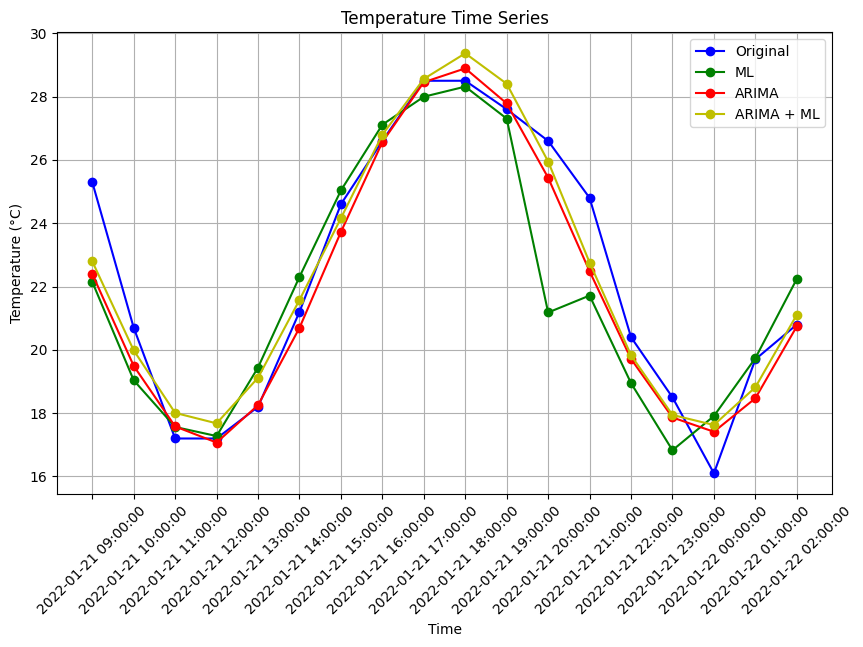

In [40]:
df_check_before = data[:(3*size_of_gap)+1]
df_check_after = data[::-1][:3*size_of_gap+1]
df_miss = data[nan_index:nan_index + size_of_gap]

last_data = data[:nan_index]
first_data = data[nan_index+size_of_gap:][::-1]

if all(value in df_check_before for value in df_miss):
    print('\nAll values in df_miss is in the first !!!')
    first(first_data)
elif all(value in df_check_after for value in df_miss):
    print('\nAll values in df_miss is in the last !!!')
    last(last_data)
else:
    print('\nAll values in df_miss is in the middle !!!')
    middle()
    